# 数据操作

In [2]:
import torch

In [3]:
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [4]:
x.shape # 张量的形状

torch.Size([12])

In [5]:
x.numel() # 张量中元素的总数

12

In [6]:
X = x.reshape(3, 4)
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [7]:
torch.zeros((2, 3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [8]:
torch.ones((2, 3, 4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [9]:
torch.randn(3, 4)

tensor([[ 1.7372,  0.2964, -1.0016,  0.7853],
        [-2.4621,  1.1153,  1.1360, -0.8599],
        [ 1.7627, -0.6555, -0.6181,  1.2547]])

In [10]:
torch.tensor([[1, 2, 3], [4, 5, 6]])

tensor([[1, 2, 3],
        [4, 5, 6]])

In [11]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y 

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [12]:
torch.exp(x) # 指数运算 $e^x$

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In [13]:
X = torch.arange(12, dtype=torch.float32).reshape((3, 4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1) # 拼接 沿着行和列拼接

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [14]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [15]:
X.sum()

tensor(66.)

In [16]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [17]:
a + b # 广播机制

tensor([[0, 1],
        [1, 2],
        [2, 3]])

In [18]:
X[-1], X[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [19]:
X[1, 2] = 9
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])

In [20]:
X[0:2, :] = 12 # 为多个元素赋值相同的值
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

In [21]:
before = id(Y)
Y = Y + X
id(Y) == before

False

In [22]:
Z = torch.zeros_like(Y) 
print('id(Z):', id(Z))
Z[:] = X + Y # 通过切片表达式将操作的结果写入一个先前分配的数组中 节省内存
print('id(Z):', id(Z))

id(Z): 5433979472
id(Z): 5433979472


In [23]:
before = id(X)
X += Y
id(X) == before

True

In [24]:
A = X.numpy()
B = torch.tensor(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [25]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

# 数据预处理

In [26]:
import os

os.makedirs(os.path.join('..', 'Deep_data'), exist_ok=True)
data_file = os.path.join('..', 'Deep_data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')  # 列名
    f.write('NA,Pave,127500\n')  # 每行表示一个数据样本
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [27]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


In [28]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
#inputs = inputs.mean()
inputs = inputs.fillna(inputs.mean(numeric_only=True)) #numeric_only=True 只对数值型数据进行填充
#inputs = inputs.fillna()
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


In [29]:
inputs = pd.get_dummies(inputs, dummy_na=True) #不理解这里bool型为true和false
#inputs.astype(int) #bool型转换为int型
inputs = inputs + 0
inputs

,NumRooms,Alley_Pave,Alley_nan
0,3.0,1,0
1,2.0,0,1
2,4.0,0,1
3,3.0,0,1


In [30]:
X, y = torch.tensor(inputs.values), torch.tensor(outputs.values) # 转化为张量
X, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

# 线性代数

In [31]:
x = torch.tensor(3.0)
y = torch.tensor(2.0)

x + y, x * y, x / y, x ** y


(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

In [32]:
x = torch.arange(4)
x, x[3], len(x)

(tensor([0, 1, 2, 3]), tensor(3), 4)

In [33]:
A = torch.arange(20).reshape(5, 4)
A, A.T

(tensor([[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11],
         [12, 13, 14, 15],
         [16, 17, 18, 19]]),
 tensor([[ 0,  4,  8, 12, 16],
         [ 1,  5,  9, 13, 17],
         [ 2,  6, 10, 14, 18],
         [ 3,  7, 11, 15, 19]]))

In [34]:
B = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]]) # 对称矩阵
B, B == B.T

(tensor([[1, 2, 3],
         [2, 0, 4],
         [3, 4, 5]]),
 tensor([[True, True, True],
         [True, True, True],
         [True, True, True]]))

In [35]:
X = torch.arange(24).reshape(2, 3, 4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [36]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = A.clone()  # 通过分配新内存，将A的一个副本分配给B
A, A + B, A * B 

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]),
 tensor([[  0.,   1.,   4.,   9.],
         [ 16.,  25.,  36.,  49.],
         [ 64.,  81., 100., 121.],
         [144., 169., 196., 225.],
         [256., 289., 324., 361.]]))

In [37]:
a = 2
X = torch.arange(24).reshape(2, 3, 4)
X, a + X, (a * X).shape

(tensor([[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11]],
 
         [[12, 13, 14, 15],
          [16, 17, 18, 19],
          [20, 21, 22, 23]]]),
 tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

In [38]:
x = torch.arange(4, dtype=torch.float32)
x, x.sum() # 降维

(tensor([0., 1., 2., 3.]), tensor(6.))

In [39]:
A_sum_axis0 = A.sum(axis=0) # 沿着行进行求和
A_sum_axis1 = A.sum(axis=1) # 沿着列进行求和
print("A=",A)
print("A.shape=",A.shape)
print("A_sum_axis0=",A_sum_axis0)
print("A_sum_axis0.shape=",A_sum_axis0.shape)
print("A_sum_axis1=",A_sum_axis1)
print("A_sum_axis1.shape=",A_sum_axis1.shape)
print("A_sum(axis=[0,1])=",A.sum(axis=[0, 1])) # Same as `A.sum()`
print("A.mean()=",A.mean())
print("A.sum()/A.numel()=",A.sum() / A.numel())
print("A.mean(axis=0)=",A.mean(axis=0))  # 沿着行进行求平均
print("A.sum(axis=0) / A.shape[0]=",A.sum(axis=0) / A.shape[0])  
print("A.sum(axis=1, keepdims=True)=\n",A.sum(axis=1, keepdims=True)) # 非降维求和
print("A / A.sum(axis=1, keepdims=True)=\n",A / A.sum(axis=1, keepdims=True)) 
print("A.cumsum(axis=0)=\n",A.cumsum(axis=0)) # 沿着行进行累加

A= tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])
A.shape= torch.Size([5, 4])
A_sum_axis0= tensor([40., 45., 50., 55.])
A_sum_axis0.shape= torch.Size([4])
A_sum_axis1= tensor([ 6., 22., 38., 54., 70.])
A_sum_axis1.shape= torch.Size([5])
A_sum(axis=[0,1])= tensor(190.)
A.mean()= tensor(9.5000)
A.sum()/A.numel()= tensor(9.5000)
A.mean(axis=0)= tensor([ 8.,  9., 10., 11.])
A.sum(axis=0) / A.shape[0]= tensor([ 8.,  9., 10., 11.])
A.sum(axis=1, keepdims=True)=
 tensor([[ 6.],
        [22.],
        [38.],
        [54.],
        [70.]])
A / A.sum(axis=1, keepdims=True)=
 tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])
A.cumsum(axis=0)=
 tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
    

## 点积 矩阵——向量积

In [40]:
y = torch.ones(4, dtype=torch.float32)
x, y, torch.dot(x, y), torch.sum(x * y)
print("x=",x)
print("y=",y)
print("torch.dot(x, y)=",torch.dot(x, y))
print("torch.sum(x * y)=",torch.sum(x * y))
print("A.shape=",A.shape)
print("x.shape=",x.shape)
print("torch.mv(A, x)=",torch.mv(A, x))

x= tensor([0., 1., 2., 3.])
y= tensor([1., 1., 1., 1.])
torch.dot(x, y)= tensor(6.)
torch.sum(x * y)= tensor(6.)
A.shape= torch.Size([5, 4])
x.shape= torch.Size([4])
torch.mv(A, x)= tensor([ 14.,  38.,  62.,  86., 110.])


In [61]:
B = torch.ones(4, 3)
print("B=",B)
print("B.shape=",B.shape)
print("torch.mm(A, B)=\n",torch.mm(A, B))

B= tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
B.shape= torch.Size([4, 3])
torch.mm(A, B)=
 tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])


弗洛贝尼乌斯范数
定义：设$ A= [a_{ij}]_{m\times n}$，是一个 $m\times n $的矩阵，
称 $||A||_F=\sqrt{tr(A^TA)}=\sqrt{\sum_{i,j}a_{ij}^2} $是矩阵 A 的 Frobenius norm。

In [42]:
u = torch.tensor([3.0, -4.0])
torch.norm(u), torch.abs(u).sum(), torch.norm(torch.ones((4, 9))) # 范数 弗罗贝尼乌斯范数

(tensor(5.), tensor(7.), tensor(6.))

# 微积分

In [43]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

def f(x):
    return 3 * x ** 2 - 4 * x

In [44]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


In [45]:
def use_svg_display():
    """Use svg format to display plot in jupyter"""
    backend_inline.set_matplotlib_formats('svg')
    
def set_figsize(figsize=(3.5, 2.5)):
    """Set matplotlib figure size"""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize
    
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set matplotlib axes"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()
    
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear', fmts=('-', 'm--', 'g-.', 'r:'),
         figsize=(3.5, 2.5), axes=None):
    """Plot data points"""
    if legend is None:
        legend = []
        
    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()
    
    # Return True if `X` (tensor or list) has 1 axis
    def has_one_axis(X):
        return (hasattr(X, 'ndim') and X.ndim == 1 or isinstance(X, list) and not hasattr(X[0], '__len__'))
    
    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
            
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

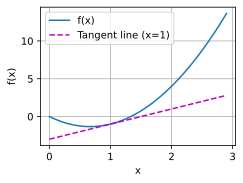

In [46]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

# 自动微分

In [47]:
x = torch.arange(4.0)
x.requires_grad_(True)
x, x.grad

(tensor([0., 1., 2., 3.], requires_grad=True), None)

In [48]:
y = 2 * torch.dot(x, x)
y, y.backward(), x.grad, x.grad == 4 * x

(tensor(28., grad_fn=<MulBackward0>),
 None,
 tensor([ 0.,  4.,  8., 12.]),
 tensor([True, True, True, True]))

In [49]:
x.grad.zero_()
y = x.sum()
y.backward()
x.grad


tensor([1., 1., 1., 1.])

In [50]:
x.grad.zero_()
y = x * x
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [51]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x
z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [52]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

In [53]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [54]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

In [55]:
a.grad == d / a

tensor(False)

# 概率

In [56]:
from torch.distributions import multinomial

In [57]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 0., 1., 0., 0.])

In [58]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([2., 4., 1., 0., 2., 1.])

In [59]:
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # Relative frequency as the estimate

tensor([0.1610, 0.1530, 0.1610, 0.1720, 0.1780, 0.1750])

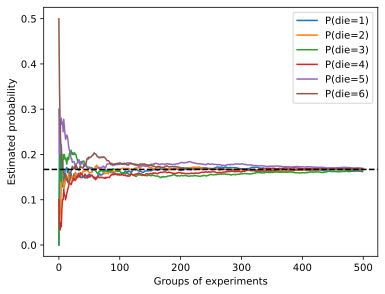

In [60]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(), label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();